In [1]:
from dfl_mirror_test import propagate_1mirror
import numpy as np
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import matplotlib.pyplot as plt

In [2]:
Ldrift = 100
roll_error  = 2.0e-6

zsep = 50
ncar = 181
dgrid = 540e-6
nslice = 2000
npad1 = (1025-ncar)//2
npadx = [int(npad1), int(npad1) + 1]
npadt = (4096 - nslice)//2
xlamds = 1.261043e-10

saveFilenamePrefix = 'L100d2_0e-6'
trms = 10e-15
peak_power = 10e9

nx_padded = ncar + int(npadx[0]) + int(npadx[1])
dx = 2. * dgrid / ncar
Dkx = 2. * np.pi / dx
kx = Dkx/ 2. * np.linspace(-1.,1.,nx_padded)
ky = Dkx/ 2. * np.linspace(-1.,1.,ncar)
kx_mesh, ky_mesh = np.meshgrid(kx, ky)
kx_mesh = kx_mesh.T
ky_mesh = ky_mesh.T

theta = kx/(2*np.pi/xlamds)
dkx = Dkx/nx_padded
dtheta = dkx * xlamds / 2. / np.pi

n_theta_shift = int(np.round(roll_error/dtheta))
real_theta_shift = n_theta_shift*dtheta

print(n_theta_shift)
print("real shift", real_theta_shift)



97
real shift 1.998062590336438e-06


In [3]:
propagate_1mirror(zsep = zsep, ncar = ncar, dgrid = dgrid, nslice = nslice, xlamds=xlamds,           # dfl params
                             npadt = npadt, Dpadt = 0, npadx = npadx,isradi = 1,       # padding params
                             peak_power = peak_power, trms = trms, w0 = 40e-6,
                             d = 100e-6,  # crystal thickness
                             Ldrift = Ldrift,
                             verboseQ = 1,    # verbose params
                             n_theta_shift = n_theta_shift,        # misalign params
                             readfilename = None, saveFilenamePrefix = saveFilenamePrefix, workdir = './data/')

took 4.765536308288574 seconds to calculate Bragg filter
took 1.0054714679718018 seconds total to make field with dimensions (2000, 181, 181)
fld shape after downsample  (2000, 181, 181)
Padded field in time by 1048 slices ( 22.041466166570476 fs) at head and tail
after padding, fld shape (4096, 181, 181)
took 7.122305631637573 seconds for fft over t
 finished 0.0 % of the job
 finished 1.0 % of the job
 finished 2.0 % of the job
 finished 4.0 % of the job
 finished 5.0 % of the job
 finished 6.0 % of the job
 finished 7.000000000000001 % of the job
 finished 9.0 % of the job
 finished 10.0 % of the job
 finished 11.0 % of the job
 finished 12.0 % of the job
 finished 13.0 % of the job
 finished 15.0 % of the job
 finished 16.0 % of the job
 finished 17.0 % of the job
 finished 18.0 % of the job
 finished 20.0 % of the job
 finished 21.0 % of the job
 finished 22.0 % of the job
 finished 23.0 % of the job
 finished 24.0 % of the job
 finished 26.0 % of the job
 finished 27.0 % of the j

In [5]:
from rfp2 import read_dfl, plot_fld_marginalize_t

2.8904643058776855 seconds to read in fld array (134189056,)
read 4096 slices
0.0 seconds to reshape fld array (4096, 181, 181)
norm = 14219453373541.46     energy = 47398.2  uJ    x , y  mean = 197.8 um , 0.0 um      x , y  rms = 66.1 um , 55.1 um     wx , wy = 132.2 um , 110.2 um     x , y  fwhm = nan um , nan um


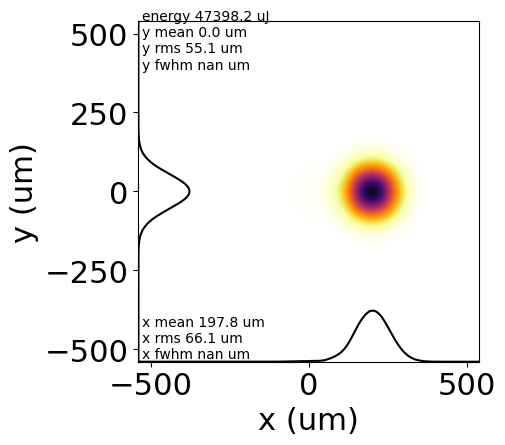

In [6]:
fld = read_dfl('./data/L100d2_0e-6.dfl', ncar = ncar)
plot_fld_marginalize_t(fld, dgrid)

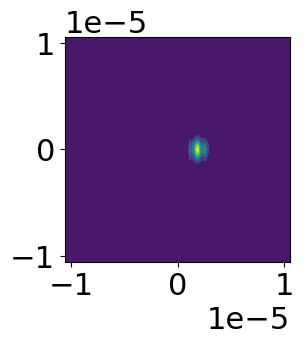

In [13]:
import matplotlib
k = 2*np.pi/xlamds
dfl_slice = fld[nslice//2, :, :]
dfl_slice = np.pad(dfl_slice, [npadx,[0,0]] )
dfl_kx = np.fft.fftshift(np.fft.fft(dfl_slice, axis = 0), axes = 0)
fig = plt.figure()
colors = matplotlib.cm.jet(np.hypot(kx_mesh,ky_mesh))
ax2 = fig.add_subplot(1, 2, 2, aspect='equal')
ax2.contourf(kx_mesh/(2*np.pi/xlamds), ky_mesh/(2*np.pi/xlamds), np.abs(dfl_kx)**2)

1.040287971496582 seconds to read in fld array (65522000,)
read 2000 slices
0.0 seconds to reshape fld array (2000, 181, 181)
norm = 20000000000000.05     energy = 66666.7  uJ    x , y  mean = 0.0 um , 0.0 um      x , y  rms = 20.0 um , 20.0 um     wx , wy = 40.0 um , 40.0 um     x , y  fwhm = nan um , nan um


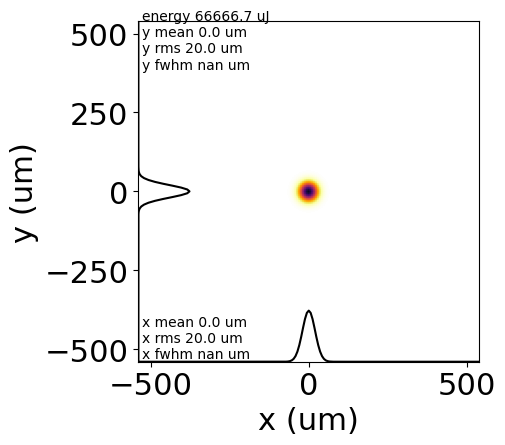

In [33]:
fld = read_dfl('./data/test1_init.dfl', ncar = ncar)
plot_fld_marginalize_t(fld, dgrid)

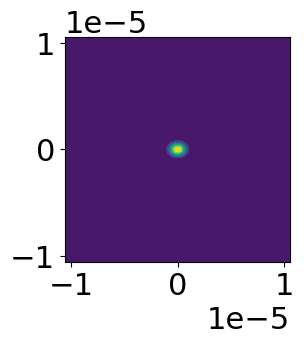

In [34]:
import matplotlib
k = 2*np.pi/xlamds
dfl_slice = fld[nslice//2, :, :]
dfl_slice = np.pad(dfl_slice, [npadx,[0,0]] )
dfl_kx = np.fft.fftshift(np.fft.fft(dfl_slice, axis = 0), axes = 0)
fig = plt.figure()
colors = matplotlib.cm.jet(np.hypot(kx_mesh,ky_mesh))
ax2 = fig.add_subplot(1, 2, 2, aspect='equal')
ax2.contourf(kx_mesh/(2*np.pi/xlamds), ky_mesh/(2*np.pi/xlamds), np.abs(dfl_kx)**2)